# Omar Benjelloun & AbdelKarim El HAJJAMI

# Projet : Classification du rythme cardiaque de l'ECG


Ce jeu de données est composé d'une collections de signaux de battements cardiaques provenant d'un jeu de données célèbres dans le domaine de la classification des battements cardiaques, le jeu de données sur l'arythmie du MIT-BIH. Le nombre d'échantillons dans cette collection est suffisamment important pour entraîner éventuellement un réseau de neurones profond.

Les signaux correspondent à des formes d'électrocardiogramme (ECG) de battements cardiaques pour le cas normal et les cas affectés par différentes arythmies et infarctus du myocarde. Ces signaux sont prétraités et segmentés, chaque segment correspondant à un battement cardiaque.



In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# import dataset
train_df = pd.read_csv("./mitbih_train.csv", header = None)
test_df = pd.read_csv("./mitbih_test.csv", header = None)

print(train_df.shape)
print(test_df.shape)

train_df.head()

(87554, 188)
(21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [87]:
# Nombres de données manquantes
null_filter = train_df.isnull().sum()
missing_values = null_filter.loc[train_df.isnull().sum() != 0].to_frame().copy()
missing_values

,0


## Données brutes

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


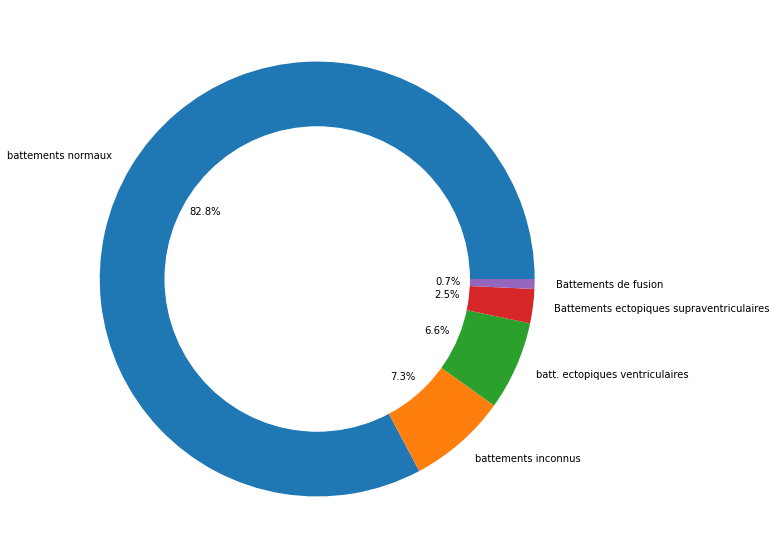

In [88]:
# representation des classes
per_class = train_df[187].value_counts()

print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Equilibrage des classes

In [89]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

NbSamples=20000

df_1_upsample=resample(df_1,replace=True,n_samples=NbSamples,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=NbSamples,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=NbSamples,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=NbSamples,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

print(train_df.shape)

(100000, 188)


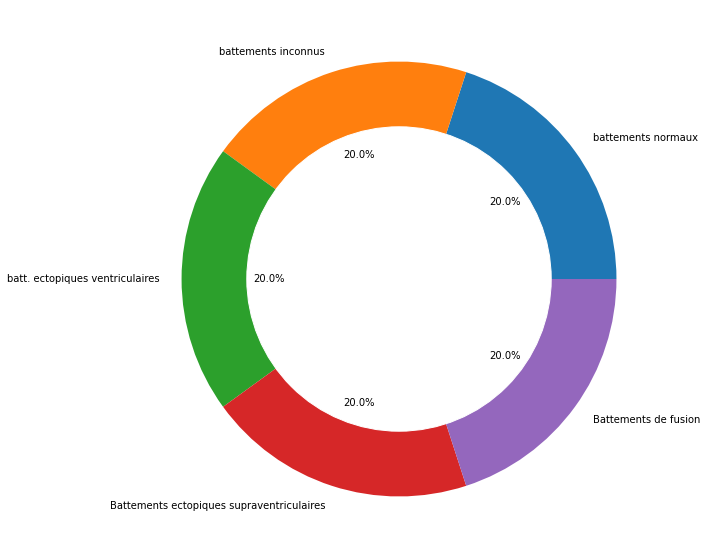

In [90]:
# Représentation des classes
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Représentation des données 

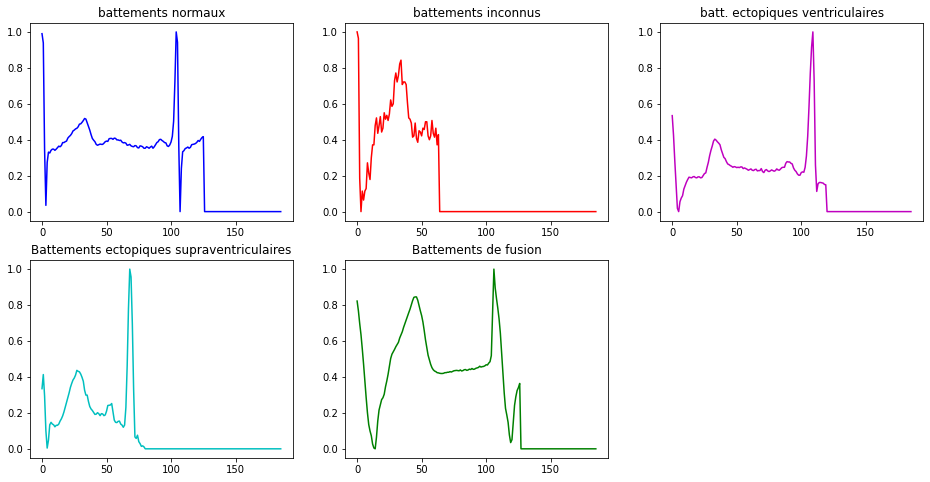

In [91]:
# représentation d'un signal pour chaque classe de battement
plt.figure(figsize=(16,8))
color=['b','r','m','c','g']
classe=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion']



for class_number in range(5):
    img=train_df.loc[train_df[187]==class_number].values
    plt.subplot(2, 3, class_number+1)
    plt.plot(img[1,:186],color[class_number])
    plt.title(classe[class_number])
    


## Jeu de données pour débuter

In [92]:
# Conversion en matrices
DataFull=np.asarray(train_df)
DataFullApp=DataFull[:,:187]
LabelFullApp=DataFull[:,187]
DataFullT=np.asarray(test_df)
DataFullTest=DataFullT[:,:187]
LabelFullTest=DataFullT[:,187]

# Premiers tests sur petite base d'apprentissage et 3 classes
N_CLASSES=3
TAILLE_TEST=10
TAILLE_APP=20

# 20 profils pour les 3 premières natures de battement cardiaque 
# 10 exemplaires de base de test 
DataApp=np.zeros((TAILLE_APP*N_CLASSES,187))

LabelApp=np.concatenate((np.zeros((TAILLE_APP,1)),np.ones((TAILLE_APP,1)),2*np.ones((TAILLE_APP,1))), axis=None)
print(0)

for i in range(N_CLASSES):
    DataApp[TAILLE_APP*i:TAILLE_APP*(i+1),:]=DataFullApp[NbSamples*i:NbSamples*i+TAILLE_APP,:]

DataTest=np.zeros((TAILLE_TEST*N_CLASSES,187))
LabelTest=np.concatenate((np.zeros((TAILLE_TEST,1)),np.ones((TAILLE_TEST,1)),2*np.ones((TAILLE_TEST,1))), axis=None)
for i in range(N_CLASSES):
    list_ind=np.where(LabelFullTest==i)
    DataTest[TAILLE_TEST*i:TAILLE_TEST*(i+1),:]=DataFullTest[list_ind[0][:10],:]

print(DataApp.shape)
print(DataTest.shape)

0
(60, 187)
(30, 187)


# Partie I : Implémentation de l'algorithme de programmation dynamique (DTW)

1. Ecrivez une fonction en python DTW qui implémente le calcul et l'affichage de la matrice des coûts définie en TD. 



In [93]:
from math import *
import numpy as np
import sys

def DTW(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    score = dtw_matrix[n][m]/(n+m)
    return dtw_matrix, score

s1 = [1,2,3,4,5]
s2 = [1,3,2,5,4]
dtw_matrix, score =  DTW(s1,s2)
print(dtw_matrix)
print(score)

[[ 0. inf inf inf inf inf]
 [inf  0.  2.  3.  7. 10.]
 [inf  1.  1.  1.  4.  6.]
 [inf  3.  1.  2.  3.  4.]
 [inf  6.  2.  3.  3.  3.]
 [inf 10.  4.  5.  3.  4.]]
0.4


## Partie II : système de reconnaissance de battements cardiaques par DTW



**Système de reconnaissance :**
Pour chaque profil temporel test :

a) Calculer pour chaque classe, le score de la DTW entre le profil temporel test et les profils temporels de la classe 

b) Déterminer la classe d'appartenance par minimum du score sur toutes les classes


In [94]:
#Utilisation de dtw de la librairie dtw-python car plus rapide 
#!pip install dtw-python

In [95]:
from dtw import dtw

# Système de reconnaissance à partir de la DTW
PartitionDTW=np.zeros((TAILLE_TEST*N_CLASSES,2))

PartitionDTW[:,0] = LabelTest 

for i in range(DataTest.shape[0]):
    dict_score = {}
    for j in range(DataApp.shape[0]):
        score = dtw(DataApp[j,:] ,DataTest[i,:]).distance #Calcul de distance
        dict_score[LabelApp[j]] = dict_score.get(LabelApp[j],[]) + [score] 
    for label, list_score in dict_score.items():
        dict_score[label] = np.mean(list_score) # moyenner les scores de chaque classe 
    PartitionDTW[i,1] = min(dict_score.keys(),key = dict_score.get) # Prendre la classe d'appartenance à partir du
    # minimum du score sur toutes les classes   
    

In [96]:
#Score de chaque classe
dict_score

{0.0: 15.672468468931038, 1.0: 20.05722778480267, 2.0: 13.286034987022868}

In [97]:
PartitionDTW

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [2., 2.],
       [2., 1.],
       [2., 0.],
       [2., 2.]])

**Evaluation :** A partir de la partition de l'ensemble test obtenue après la DTW, calculer la matrice de confusion qui recense le nombre de données bien classés et mal classés.

Matrice de confusion par DTW
Accuracy sur base de test : 0.4


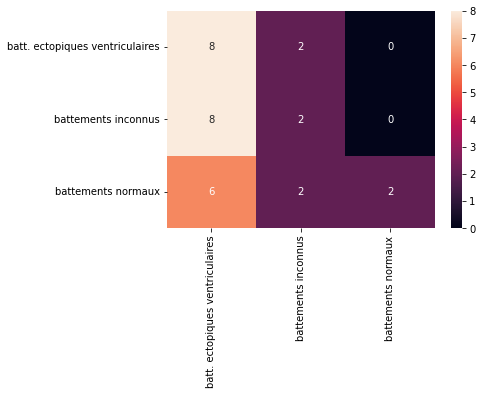

In [98]:
# Evaluation des résultats par matrices de confusion 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Matrice de confusion par DTW')
cm=confusion_matrix(PartitionDTW[:,0],PartitionDTW[:,1])
sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# score de performance
print('Accuracy sur base de test :',accuracy_score(PartitionDTW[:,0],PartitionDTW[:,1]))

## Partie III : comparaison de la programmation dynamique avec une méthode de classification après réduction de dimension par ACP

Dans cette partie, nous allons comparer les résultats de la DTW avec ceux d'une méthode de classification de données : les k-plus proches voisins.

Nous utiliserons les fonctions permettant de calculer l'ACP et les kppv via la librairie python *scikit-learn*.


In [99]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

### Prétraitement par ACP

Pour tester une autre méthode de classification, 

1. A partir des données Data_App de la base d'apprentissage et en utilisant la fonction *PCA* de la librairie *scikit-learn*, calculez les 3 axes principaux de l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$.Ces vecteurs propres constitueront la nouvelle base de données.

2. Projetez les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque
vecteur par la base $P = [X_1X_2X_3]$.

*Remarque :* vous pouvez aussi implémenter l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau repère P.  Projetez ensuite les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.



In [100]:
# Extraction des trois vecteurs principaux 
pca = PCA(n_components=3, random_state=42)

# Normalisation
scaler = StandardScaler()
DataApp_scaled= scaler.fit_transform(DataApp)
DataTest_scaled = scaler.transform(DataTest)

# Projection dans la nouvelles base
DataApp_PCA = pca.fit_transform(DataApp_scaled)
DataTest_PCA = pca.transform(DataTest_scaled)

pca.explained_variance_ratio_


array([0.49439483, 0.16243077, 0.07440128])

In [101]:
df_pca = pd.DataFrame(data= DataApp_PCA)
df_pca.head()

,0,1,2
0,16.911657,-11.364131,5.001360
1,4.009560,-4.086641,3.845644
2,-2.008534,0.585657,4.108348
3,-5.433531,-0.580661,-2.273152
4,-9.260242,2.548845,-1.382842


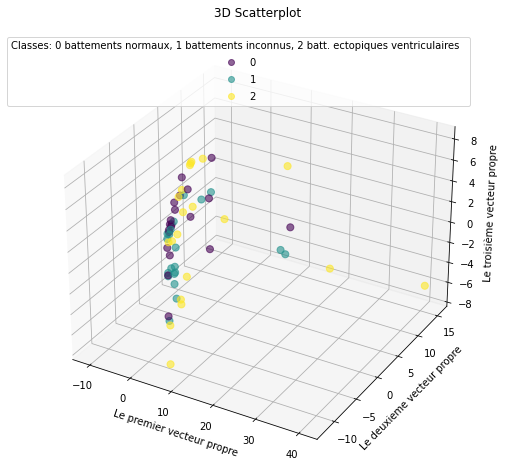

In [102]:
#Visualisation
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(DataApp_PCA[:,0], DataApp_PCA[:,1], DataApp_PCA[:,2], c =LabelApp, s= 50, alpha=0.6)
plt.title('3D Scatterplot', pad=15)
ax.set_xlabel('Le premier vecteur propre')
ax.set_ylabel('Le deuxieme vecteur propre')
ax.set_zlabel('Le troisième vecteur propre')
legend1 = ax.legend(*sctt.legend_elements(), title="Classes: 0 battements normaux, 1 battements inconnus, 2 batt. ectopiques ventriculaires  ")
plt.show()


### Classification par k plus proches voisins

En intelligence artificielle, la méthode des k plus proches voisins (k-ppv) est une méthode d'apprentissage
supervisé. Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples  "donnée-label". Pour estimer la sortie associée à une nouvelle entrée x, la méthode des k plus proches voisins consiste à prendre
en compte (de façon identique) les k échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle
entrée x, selon une distance à définir. 


1. En utilisant la fonction *KNeighborsClassifier* de la librairie *sklearn.neighbors*, réalisez une classification par k-ppv sur la base d'apprentissage et la base de test que vous avez prédéfinies (prendre $k=1$).

2. Evaluez la méthode des k-ppv par le calcul de la matrice de confusion et du taux de reconnaissance.

3. Modifiez la valeur de $k$ pour les k-ppv. Améliorez-vous les scores de reconnaissance ?

4. Comparez vos résultats avec ceux de la DTW.





In [103]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [104]:
# Modèle KNN
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(DataApp_PCA, LabelApp)
predict = clf.predict(DataTest_PCA)

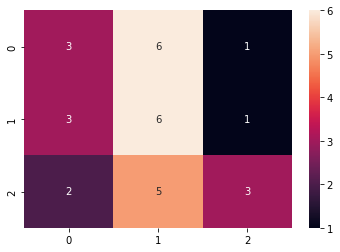

Accuracy avec k=1:  0.4
              precision    recall  f1-score   support

         0.0       0.38      0.30      0.33        10
         1.0       0.35      0.60      0.44        10
         2.0       0.60      0.30      0.40        10

    accuracy                           0.40        30
   macro avg       0.44      0.40      0.39        30
weighted avg       0.44      0.40      0.39        30



In [105]:
# Evaluation
# Matrice de confusion
confusion_matrix_knn = confusion_matrix(LabelTest, predict)
classication_report_knn = classification_report(LabelTest, predict)
sns.heatmap(confusion_matrix_knn , annot=True)
plt.show()

# Taux de reconnaissance
print('Accuracy avec k=1: ' , accuracy_score(LabelTest, predict))
print(classication_report_knn)

Text(0, 0.5, 'Mean Error')

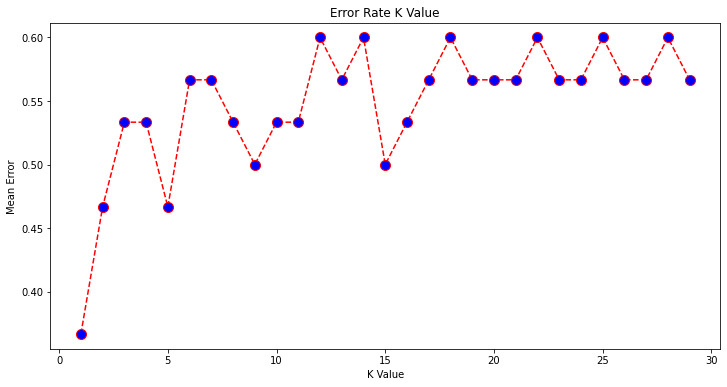

In [106]:
error = []

# Calcul de l'erreur pour k de 1 à 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(DataApp, LabelApp)
    pred_i = knn.predict(DataTest)
    error.append(np.mean(pred_i != LabelTest))

# Plot l'erreur moyenne en fonction de l'hyperparametre k

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')    

In [107]:
# Comparaison entre Knn et DTW

dtw_accuracy = accuracy_score(PartitionDTW[:,0],PartitionDTW[:,1])
knn_accuracy = accuracy_score(LabelTest, predict)

print( 'La precision avec la methode DTW : ', dtw_accuracy*100, '%' )
print( 'La precision avec la methode K-ppv : ', knn_accuracy *100 ,'%')

La precision avec la methode DTW :  40.0 %
La precision avec la methode K-ppv :  40.0 %


## Partie IV : Comparaison avec d'autres méthodes d'apprentissages supervisés


### Classification par Forêts aléatoires

Les forêts aléatoires font partie des techniques d'apprentissage automatique. Cet algorithme combine les concepts de sous-espaces aléatoires et de bagging. L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

In [108]:
from sklearn.ensemble import RandomForestClassifier 

L'accuracy avec le model RandomForest:  0.5333333333333333


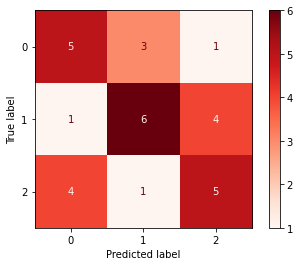

In [109]:
#Modèle
clf = RandomForestClassifier(n_estimators=500, 
                            max_depth=20,random_state = 42)
clf.fit(DataApp,LabelApp)
predFA = clf.predict(DataTest)
accuracy = clf.score(DataTest, LabelTest)
print("L'accuracy avec le model RandomForest: ",accuracy)

cm2 = confusion_matrix(predFA, LabelTest)
cm_display1 = ConfusionMatrixDisplay(cm2).plot(cmap = 'Reds')

### Classification par réseaux de neurones

1. Réaliser une classification via les réseaux de neurones
2. Evaluer les résultats par matrice de confusion par exemple, fonction de perte...
3. Tester différentes architectures et différentes solveurs

In [110]:
from sklearn.neural_network import MLPClassifier

In [111]:
#Modèle
clf = MLPClassifier(alpha=0.001, max_iter=1000,
                    solver = 'adam', learning_rate_init = 0.001,
                    random_state = 42).fit(DataApp, LabelApp)

predNN = clf.predict(DataTest)

print("Accuracy avec un réseau de neurones:",accuracy_score(LabelTest, 
                                                            predNN))


Accuracy avec un réseau de neurones: 0.7


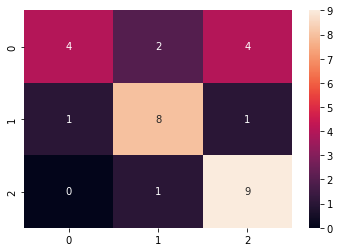

              precision    recall  f1-score   support

         0.0       0.80      0.40      0.53        10
         1.0       0.73      0.80      0.76        10
         2.0       0.64      0.90      0.75        10

    accuracy                           0.70        30
   macro avg       0.72      0.70      0.68        30
weighted avg       0.72      0.70      0.68        30



In [112]:
# Evaluation avec la matrice de confusion
confusion_matrix_mlp = confusion_matrix(LabelTest, predNN)
classication_report_mlp = classification_report(LabelTest, predNN)
sns.heatmap(confusion_matrix_mlp , annot=True)
plt.show()
print(classication_report_mlp)

training: constant learning-rate
Training set score: 0.450000
Training set loss: 0.983592
training: constant without momentum
Training set score: 0.766667
Training set loss: 0.575437
training: constant with Nesterov's momentum
Training set score: 0.766667
Training set loss: 0.574387
training: adam
Training set score: 1.000000
Training set loss: 0.014470


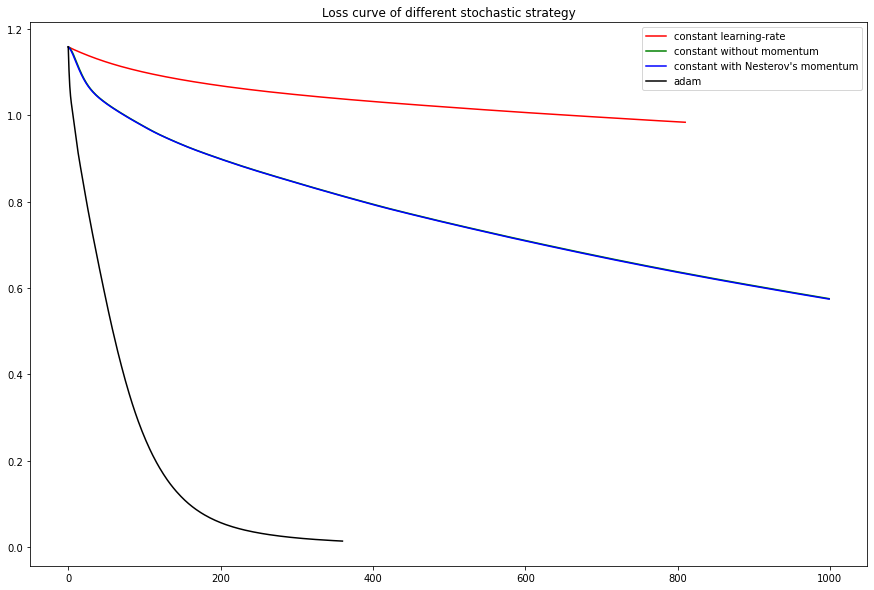

In [113]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Tester avec d'autres parameters et solveurs

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.001},
          {'solver': 'adam', 'learning_rate_init': 0.001}]

labels = ["constant learning-rate", "constant without momentum",
          "constant with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X, y):
    # for each dataset, plot learning for each learning strategy
    mlps = []
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=1000, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

plt.figure(figsize=(15, 10))
plot_on_dataset(DataApp, LabelApp)
plt.title('Loss curve of different stochastic strategy')
plt.legend()
plt.show()        

# Partie V : votre étude

Réalisez votre propre étude en :
- en augmentant les bases de test et/ou d'apprentissage, en faisant du prétraitements sur les données
- en proposant des variantes des méthodes proposées ou en utilisant d'autres méthodes
- en rajoutant davantage de classes (jusqu'à 2 supplémentaires : 4-Battements ectopiques supraventriculaires, 5-Battements de fusion)
le tout en testant les différentes approches et en interprétant les résultats, à synthétiser sur un rapport. 

## Préparation des données

In [114]:
# Conversion en matrices
DataFull=np.asarray(train_df)
DataFullApp=DataFull[:,:187]
LabelFullApp=DataFull[:,187]
DataFullT=np.asarray(test_df)
DataFullTest=DataFullT[:,:187]
LabelFullTest=DataFullT[:,187]


N_CLASSES=5
TAILLE_TEST=162
TAILLE_APP=10000

# 10000 profils pour les 5 natures de battement cardiaque 
# 162 exemplaires de base de test 
DataApp=np.zeros((TAILLE_APP*N_CLASSES,187))

LabelApp=np.concatenate((np.zeros((TAILLE_APP,1)),np.ones((TAILLE_APP,1)),2*np.ones((TAILLE_APP,1)),3*np.ones((TAILLE_APP,1)),4*np.ones((TAILLE_APP,1))), axis=None)
print(0)

for i in range(N_CLASSES):
    DataApp[TAILLE_APP*i:TAILLE_APP*(i+1),:]=DataFullApp[NbSamples*i:NbSamples*i+TAILLE_APP,:]

DataTest=np.zeros((TAILLE_TEST*N_CLASSES,187))
LabelTest=np.concatenate((np.zeros((TAILLE_TEST,1)),np.ones((TAILLE_TEST,1)),2*np.ones((TAILLE_TEST,1)),3*np.ones((TAILLE_TEST,1)),4*np.ones((TAILLE_TEST,1))), axis=None)
print()
for i in range(N_CLASSES):
    list_ind=np.where(LabelFullTest==i)
    DataTest[TAILLE_TEST*i:TAILLE_TEST*(i+1),:]=DataFullTest[list_ind[0][:162],:]

print("training set size ",DataApp.shape)
print(LabelApp.shape)
print("test set size ",DataTest.shape)
print(LabelTest.shape)

0

training set size  (50000, 187)
(50000,)
test set size  (810, 187)
(810,)


In [115]:
X = pd.DataFrame(DataApp)
y = pd.DataFrame(LabelApp)

X_test = pd.DataFrame(DataTest)
y_test = pd.DataFrame(LabelTest)

# Normalizing the data
#sc = StandardScaler()
#X = sc.fit_transform(X)
#X_test = sc.transform(X_test)

# split data into training and validation data
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)

(40000, 187)
(40000, 1)


## RandomForestClassifier

RandomForest accuracy on test set:  0.8987654320987655


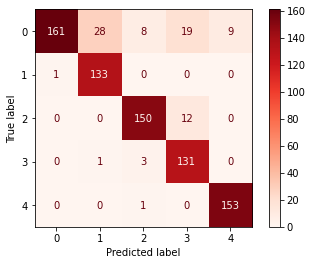

In [127]:
rdmForest = RandomForestClassifier(n_estimators=300, max_depth=24
                                   , n_jobs=-1, random_state=42)

rdmForest.fit(DataApp,LabelApp)
predFA = rdmForest.predict(DataTest)
accuracy = rdmForest.score(DataTest, LabelTest)
print("RandomForest accuracy on test set: " , accuracy)

cm2 = confusion_matrix(predFA, LabelTest)
cm_display1 = ConfusionMatrixDisplay(cm2).plot(cmap = 'Reds')

In [117]:
#Optimize Hyperparameters with GridSearch
from sklearn.model_selection import GridSearchCV
model_name = 'RandomForest'

grid = {'max_depth': range(15,25,3),
                    'min_samples_leaf':range(1,5,2),
                    'n_estimators': [100, 200, 300]}

model_cv = GridSearchCV(RandomForestClassifier(), grid,scoring='accuracy',cv=3,n_jobs=-1)
model_cv.fit(DataApp, LabelApp)
train_preds = model_cv.predict(DataApp)

In [118]:
save_dict= {}
save_dict[model_name] = {'model':model_cv,
                         'scores':{'train': model_cv.best_score_,
                                   }}
print(f" -  {model_name} best hyperparameters : {model_cv.best_params_}",
      '\n\n')

 -  RandomForest best hyperparameters : {'max_depth': 24, 'min_samples_leaf': 1, 'n_estimators': 300} 




## LightgbmClassifier

In [119]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMClassifier(num_leaves=23,
                               n_estimators=100, 
                               max_depth=20,  
                               n_jobs = -1
                            )

base_lgb_model.fit(X_train, y_train, 
                 eval_set = [(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds = 200
                )

/home/omar/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/omar/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/omar/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's multi_logloss: 1.34633	valid_1's multi_logloss: 1.34936
[2]	training's multi_logloss: 1.16236	valid_1's multi_logloss: 1.16759
[3]	training's multi_logloss: 1.02173	valid_1's multi_logloss: 1.02847
[4]	training's multi_logloss: 0.907222	valid_1's multi_logloss: 0.915459
[5]	training's multi_logloss: 0.814653	valid_1's multi_logloss: 0.82399
[6]	training's multi_logloss: 0.735069	valid_1's multi_logloss: 0.745331
[7]	training's multi_logloss: 0.667429	valid_1's multi_logloss: 0.679319
[8]	training's multi_logloss: 0.610363	valid_1's multi_logloss: 0.623412
[9]	training's multi_logloss: 0.560803	valid_1's multi_logloss: 0.574086
[10]	training's multi_logloss: 0.518524	valid_1's multi_logloss: 0.533102
[11]	training's multi_logloss: 0.480307	valid_1's multi_logloss: 0.495587
[12]	training's multi_logloss: 0.448006	valid_1's multi_logloss: 0.463663
[13]	training's multi_logloss: 0.418138	valid_1's multi_logloss: 0.434826
[14]	training's multi_logloss: 0.39253	valid_1's multi

LGBMClassifier(max_depth=20, num_leaves=23)

Model accuracy on test set:  0.917283950617284


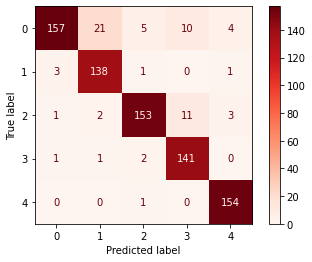

In [120]:
predlgb = base_lgb_model.predict(DataTest)
accuracy = base_lgb_model.score(DataTest, LabelTest)
print("Model accuracy on test set: " , accuracy)

cm2 = confusion_matrix(predlgb, LabelTest)
cm_display1 = ConfusionMatrixDisplay(cm2).plot(cmap = 'Reds')

Model accuracy on test set:  0.9246913580246914


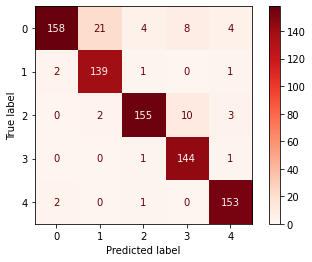

In [121]:
#Bagging
from sklearn.ensemble import BaggingClassifier
Baglgb = BaggingClassifier(base_estimator=base_lgb_model,
                       n_estimators=10, n_jobs=-1)

Baglgb.fit(DataApp, LabelApp)

predbag = Baglgb.predict(DataTest)
accuracy = Baglgb.score(DataTest, LabelTest)
print("Model accuracy on test set: " , accuracy)

cm2 = confusion_matrix(predbag, LabelTest)
cm_display1 = ConfusionMatrixDisplay(cm2).plot(cmap = 'Reds')

## Artificial Neural Network

In [122]:
#One hot encoding is a process to convert integer classes into binary values
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y_test = ohe.fit_transform(y_test).toarray()

#split data into training and vali data
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)

(40000, 187)
(40000, 5)


In [123]:
#Model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# define the keras model

#Dependencies
model = Sequential()
model.add(Dense(32, input_dim=187, activation='relu'))
#model.add(Dropout(0.2)) #Dropout
model.add(Dense(24, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation='sigmoid'))
#model.add(Dropout(0.1))

#Early Stopping
callback = EarlyStopping(monitor='loss', patience=3)

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data = (X_valid,y_valid), epochs=100, batch_size=64
                   ,callbacks=[callback]
                   )

Epoch 1/100
625/625 [==============================] - 2s 3ms/step - loss: 0.3301 - accuracy: 0.6169 - val_loss: 0.2267 - val_accuracy: 0.7509
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1973 - accuracy: 0.7973 - val_loss: 0.1722 - val_accuracy: 0.8197
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1622 - accuracy: 0.8345 - val_loss: 0.1554 - val_accuracy: 0.8419
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1447 - accuracy: 0.8529 - val_loss: 0.1381 - val_accuracy: 0.8643
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1336 - accuracy: 0.8662 - val_loss: 0.1330 - val_accuracy: 0.8720
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1263 - accuracy: 0.8744 - val_loss: 0.1256 - val_accuracy: 0.8831
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.1202 - accuracy: 0.8825 - val_loss: 0.1198 - val_accuracy: 0.8861

Epoch 58/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0467 - accuracy: 0.9630 - val_loss: 0.0638 - val_accuracy: 0.9503
Epoch 59/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9653 - val_loss: 0.0611 - val_accuracy: 0.9542
Epoch 60/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0444 - accuracy: 0.9657 - val_loss: 0.0636 - val_accuracy: 0.9507
Epoch 61/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9661 - val_loss: 0.0653 - val_accuracy: 0.9531
Epoch 62/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0445 - accuracy: 0.9653 - val_loss: 0.0613 - val_accuracy: 0.9539
Epoch 63/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0429 - accuracy: 0.9665 - val_loss: 0.0630 - val_accuracy: 0.9533
Epoch 64/100
625/625 [==============================] - 2s 3ms/step - loss: 0.0429 - accuracy: 0.9664 - val_loss: 0.0645 - val_accuracy:

Accuracy on test set is: 88.51851851851852


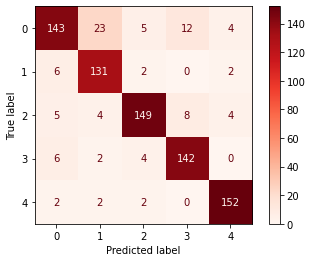

In [124]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
#accuracy
a = accuracy_score(pred,test)
print('Accuracy on test set is:', a*100)
cm2 = confusion_matrix(pred, test)
cm_display1 = ConfusionMatrixDisplay(cm2).plot(cmap = 'Reds')

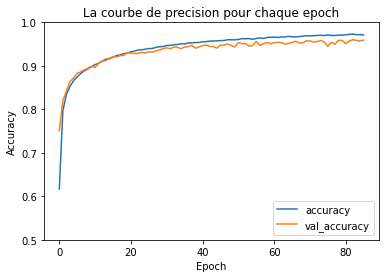

In [125]:
#accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('La courbe de precision pour chaque epoch')
plt.legend(loc='lower right')

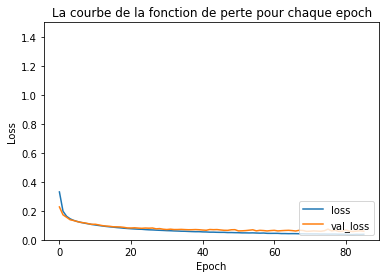

In [126]:
#loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.title('La courbe de la fonction de perte pour chaque epoch')
plt.legend(loc='lower right')